<a href="https://colab.research.google.com/github/tomaszpionka/ds-project/blob/main/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import files
import pandas as pd

# uploaded = files.upload()
df = pd.read_csv("BostonHousing.csv")
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6

# Zadanie 1 (6ptk)
Dokonaj podziału danych na zbiór treningowy i test w proporcji 0,75/0,25.

In [22]:
df = df.drop(['chas'], axis = 1)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
ptratio,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


In [24]:
# target
df_y = df['medv']
# data
df_x = df.drop(['medv'], axis = 1)

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.25, random_state = 42)

# Zadanie 2 (6ptk)
Usuń ze zbioru kolumną „Chas”. Dokonaj standaryzacji wszystkich kolumn poza „Medv”

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_standard = ss.fit_transform(x_train)
x_test_standard = ss.fit_transform(x_test)

print(x_train_standard.mean(axis = 0))
print(x_train_standard.std(axis = 0))

[-8.43652325e-17  2.22630475e-17  3.35117451e-16 -5.69465319e-16
  1.52326114e-17 -9.84261046e-17  9.37391472e-18  8.08500145e-17
  9.72543652e-17 -7.82721879e-16 -1.17173934e-17 -2.23802214e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



# Zadanie 3 (6ptk)
Przedstaw w formie heatmapy oraz ramki danych, macierz korelacji dla wszystkich kolumn danych.

In [28]:
df_corr = df.corr()
df_corr

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
ptratio,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


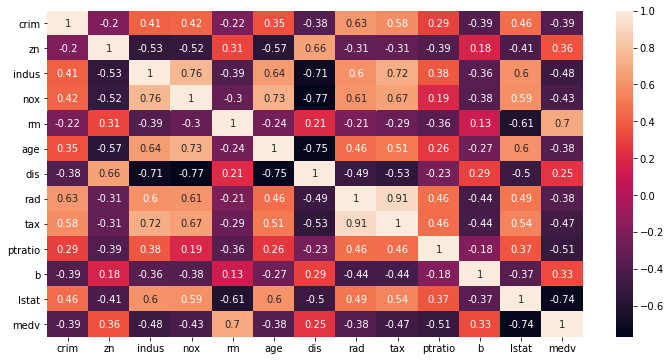

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96418d2278>,
      dtype=object)

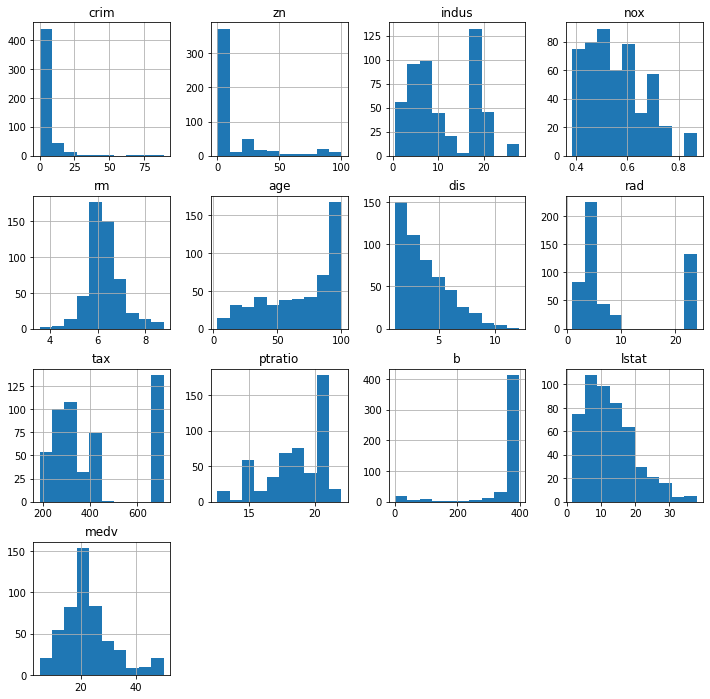

In [18]:
df.hist(figsize=(12,12))

In [19]:
## test

## Zadanie 1 (8ptk)
Przeprowadź regresję z użyciem modelu liniowego. Wskaż zmienne dla których wartość parametru liniowego była najwyższa.

In [31]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train_standard, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
from heapq import nlargest 
linear_parameters = reg.coef_
model_features = df_x.columns

coef_dict = {}
for param, feat in zip(linear_parameters, model_features):
  coef_dict[feat] = param

highest_coef = nlargest(3, coef_dict, key = coef_dict.get)  
for val in highest_coef: 
    print(val, ":", coef_dict.get(val)) 

rm : 3.185256906500559
rad : 2.4212971629592888
b : 1.2040436849553857


In [57]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test_standard)

r_squared_linear_reg = mean_squared_error(y_test, y_pred)
r_squared_linear_reg

25.387796997303763

## Zadanie 2 (8ptk)
Przeprowadź regresję z użyciem sieci neuronowej o 3 warstwach (po trzy neurony w każdej warstwie).

## Zadanie 3 (8ptk)
Porównaj obydwa modele z użyciem współczynnika R kwadrat.


## Zadanie 1 (7ptk)
Stwórz wykres rozrzutu reprezentujący relację pomiędzy kolumnami medv i crim. Nałóż na ten wykres linię trendu.


## Zadanie 2 (15ptk)
Stwórz Dashboard, który będzie zawierał:
*	Wykres słupkowy dla parametrów z modelu liniowego
*	Histogram dla wybranej kolumny danych
*	Wykres rozrzutu dla dowolnej pary kolumn
